# Pymaceuticals Inc.
---

### Analysis

- This is a study of Drug Regimen and its effect on Tumor in mice with refernce to a timepoint in the study
- g989 is the duplicate mice id and was removed from the analysis to get clean data
- Tumor Volume in Remicare and Capmoulin is slightly less than the other drugs. Though the timepoint is also 
- a factor in affecting the volume. 

- The number of mice that were tested were more in these two drugs as well and least in propriva
- The test was done on approximately equal percentage of male and female mice

- Statistically Capmpulin and Ramicare is most effective and Infubmil has an outlier value so its effect is inconsistent

- Over period of time a single mce tumor volume reduced considerably by staying on the regimen for Capmoulin
- The weight is also proportional to the Tumor volume 


 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='left')

# Display the data table for preview
#combined_data_df.sort_values('Tumor Volume (mm3)')
combined_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice.
number_of_mice = len(pd.unique(combined_data_df['Mouse ID']))

number_of_mice

249

In [37]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# # Optional: Get all the data for the duplicate mouse ID. 
#duplicate_rows = combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_rows = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_rows['Mouse ID'])==False]
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(pd.unique(combined_data_df['Mouse ID']))

number_of_mice

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
#mmean

combined_data_df_mean = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
combined_data_df_median = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
combined_data_df_variance = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
combined_data_df_std = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
combined_data_df_sem = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

combined_data_df_stats = pd.DataFrame({"Mean Tumor Volume":combined_data_df_mean,
                                       "Median Tumor Volume":combined_data_df_median,
                                       "Tumor Volume Variance":combined_data_df_variance,
                                       "Tumor Volume Std Dev":combined_data_df_std,
                                       "Tumor Volume Std Err":combined_data_df_sem})

combined_data_df_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = combined_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_agg




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

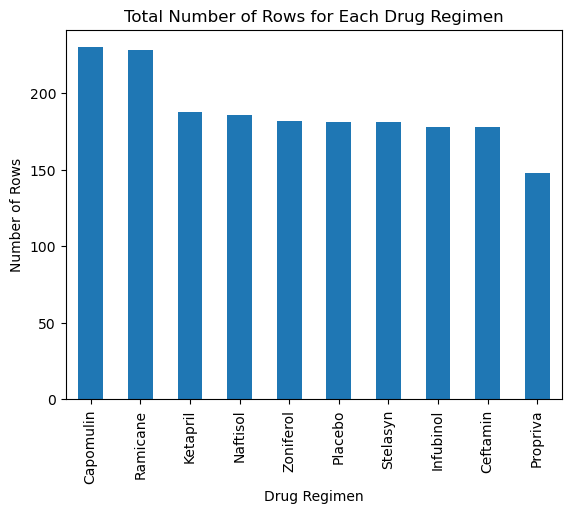

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Use value count to sort and count together
regimen_counts = combined_data_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()




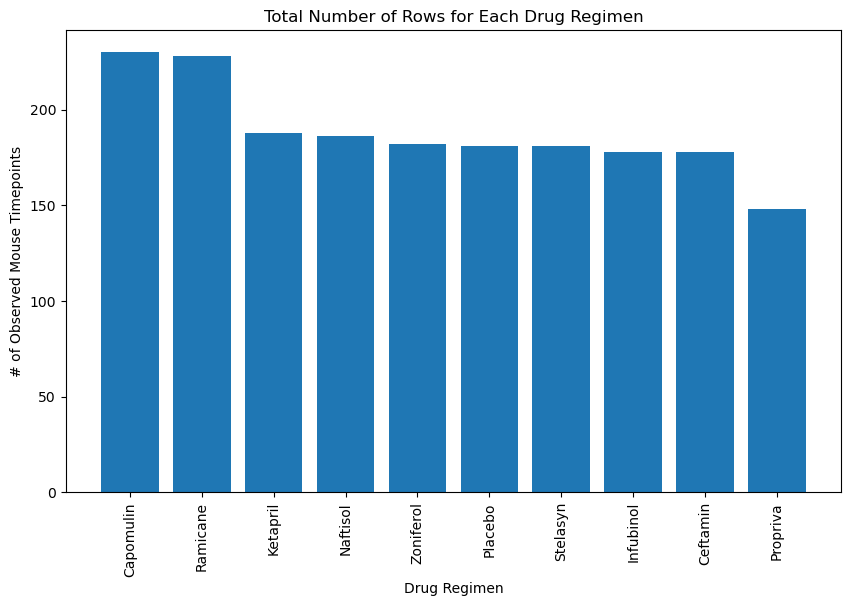

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Pyplot for bar

fig = plt.figure(figsize = (10, 6))
plt.bar(regimen_counts.index,regimen_counts.values, align ="center")
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


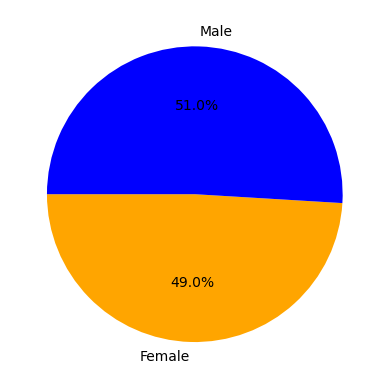

In [44]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_mice = (combined_data_df['Sex'].value_counts()['Male'])
female_mice = (combined_data_df['Sex'].value_counts()['Female'])

Total_count = male_mice + female_mice
labels = ("Female","Male")
male_percent = (male_mice/Total_count) * 100
female_percent = (female_mice/Total_count) * 100

mice_data = (female_percent,male_percent)

colors = ['Orange','Blue']
explode = (0,0)
plt.pie(mice_data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.show()

([<matplotlib.patches.Wedge at 0x7f99248f8c40>,
 [Text(-0.0330820140826155, -1.0995024239828841, 'Female'),
  Text(0.03308201408261563, 1.0995024239828841, 'Male')],
 [Text(-0.018044734954153905, -0.5997285948997549, '49.0%'),
  Text(0.018044734954153978, 0.5997285948997549, '51.0%')])

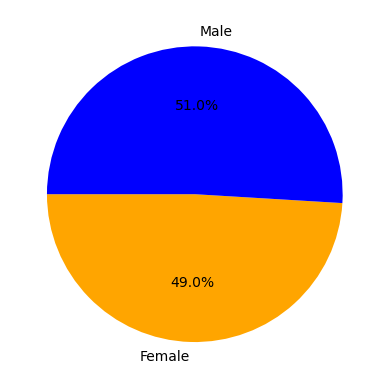

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
data_tumor_vol = combined_data_df.groupby(['Mouse ID'])["Timepoint"].max()
data_tumor_vol = data_tumor_vol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

data_tumor_vol_final = data_tumor_vol[["Mouse ID","Timepoint"]].merge(combined_data_df,on=['Mouse ID','Timepoint'],how="left")

data_tumor_vol_final


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [47]:
# Put treatments into a list for for loop (and later for plot labels)

 
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes    
# add subset 
# Determine outliers using upper and lower bounds

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


drug_data_list = []
for drug in treatment_list:
    final_vols = data_tumor_vol_final[data_tumor_vol_final["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    drug_data_list.append(final_vols)       
        
    df = pd.DataFrame(drug_data_list)

    quartiles = final_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(drug)
    print('Iqr:',iqr, "Lower bound:",lower_bound,"Upper bound:",upper_bound, 
          "Lower quartile:",lowerq, "Upper quartile:",upperq)
    print(f"Values below {lower_bound} could be outliers for:",drug)
    print(f"Values above {upper_bound} could be outliers for:", drug)
    print('------------------------------------------------------------')



Capomulin
Iqr: 7.781863460000004 Lower bound: 20.70456164999999 Upper bound: 51.83201549 Lower quartile: 32.37735684 Upper quartile: 40.1592203
Values below 20.70456164999999 could be outliers for: Capomulin
Values above 51.83201549 could be outliers for: Capomulin
------------------------------------------------------------
Ramicane
Iqr: 9.098536719999998 Lower bound: 17.912664470000003 Upper bound: 54.30681135 Lower quartile: 31.56046955 Upper quartile: 40.65900627
Values below 17.912664470000003 could be outliers for: Ramicane
Values above 54.30681135 could be outliers for: Ramicane
------------------------------------------------------------
Infubinol
Iqr: 11.477135160000003 Lower bound: 36.83290494999999 Upper bound: 82.74144559000001 Lower quartile: 54.04860769 Upper quartile: 65.52574285
Values below 36.83290494999999 could be outliers for: Infubinol
Values above 82.74144559000001 could be outliers for: Infubinol
------------------------------------------------------------
Cefta

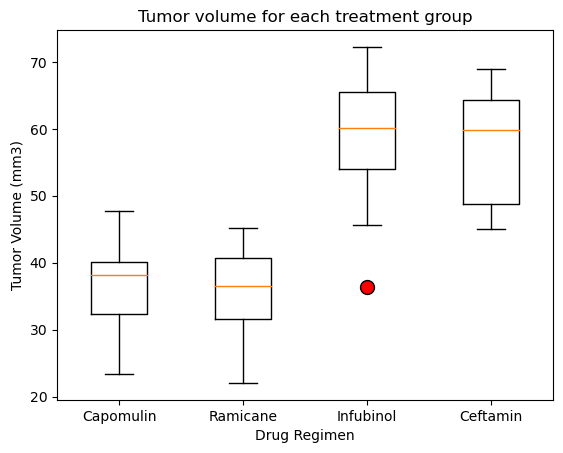

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()


ax1.boxplot(drug_data_list, positions=range(len(drug_data_list)),
           labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
           flierprops = dict( markerfacecolor = "red",markersize = 10))
ax1.set_title("Tumor volume for each treatment group")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

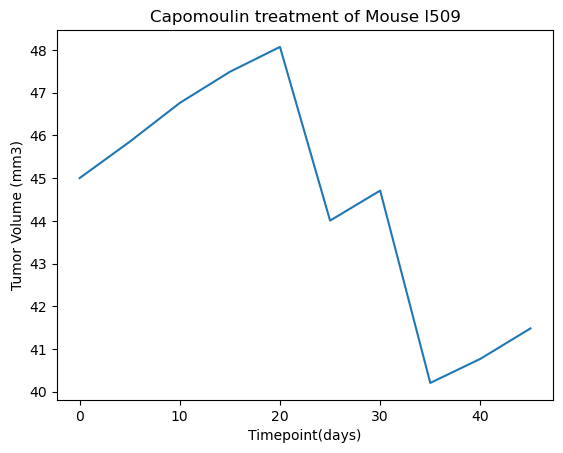

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

cap_mouse_df = combined_data_df.loc[(combined_data_df['Drug Regimen'] == "Capomulin")]
cap_mouse_id = cap_mouse_df.loc[cap_mouse_df['Mouse ID']=='l509']

mouse_plt,=plt.plot(cap_mouse_id["Timepoint"], cap_mouse_id["Tumor Volume (mm3)"])

plt.title("Capomoulin treatment of Mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

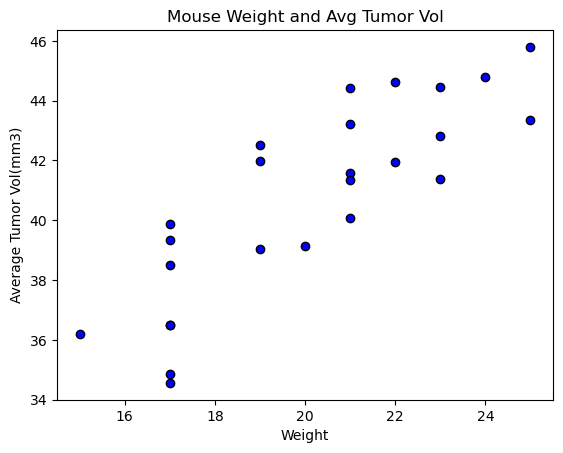

In [50]:
#Generate a scatter plot of Mouse weight and average Tumor vol
tumor_vol = cap_mouse_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
tumor_mean =average_df=pd.DataFrame(tumor_vol.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

plt.scatter(tumor_mean['Weight (g)'], tumor_mean['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")
plt.title("Mouse Weight and Avg Tumor Vol")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Vol(mm3)')
plt.show()

## Correlation and Regression

In [51]:
correlation = st.pearsonr(tumor_mean['Weight (g)'],tumor_mean['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumor volume is: {round(st.pearsonr(tumor_mean['Weight (g)'],tumor_mean['Tumor Volume (mm3)'])[0],2)}")

The correlation between mouse weight and the average tumor volume is: 0.84


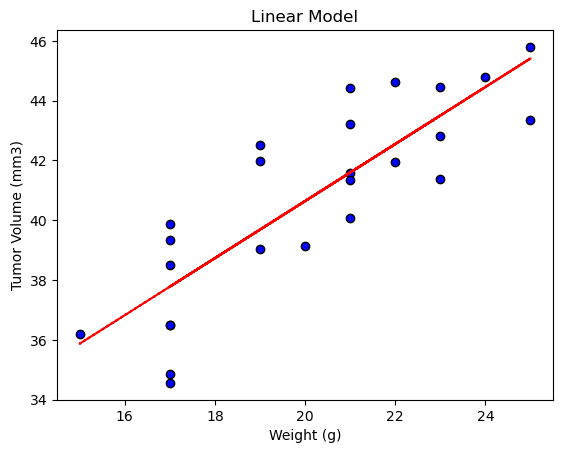

In [56]:
# Plot the linear model on top of scatter plot 

tumor_vol = cap_mouse_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
tumor_mean =average_df=pd.DataFrame(tumor_vol.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Perform a linear regression on weight vs Tumor vol
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#pe_r has the r value
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(tumor_mean['Weight (g)'], tumor_mean['Tumor Volume (mm3)'])

# Create equation of line to get trendline
# regress_values = x_values * slope + intercept

pe_fit = pe_slope * tumor_mean['Weight (g)'] + pe_int


plt.scatter(tumor_mean['Weight (g)'], tumor_mean['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(tumor_mean['Weight (g)'],pe_fit,"--",color = 'red')

plt.title('Linear Model')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
